In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
from src.paths import RESIDUALS_DATA_DIR, VISUALIZATIONS_DIR

In [4]:
residuals_model_1 = pd.read_csv(os.path.join(RESIDUALS_DATA_DIR / 'residuals_lightgbm_1.csv'))
residuals_model_2 = pd.read_csv(os.path.join(RESIDUALS_DATA_DIR / 'residuals_lightgbm_2.csv'))
residuals_model_3 = pd.read_csv(os.path.join(RESIDUALS_DATA_DIR / 'residuals_lightgbm_3.csv'))

/Users/cmartinez/anaconda3/envs/python39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cmartinez/anaconda3/envs/python39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cmartinez/anaconda3/envs/python39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


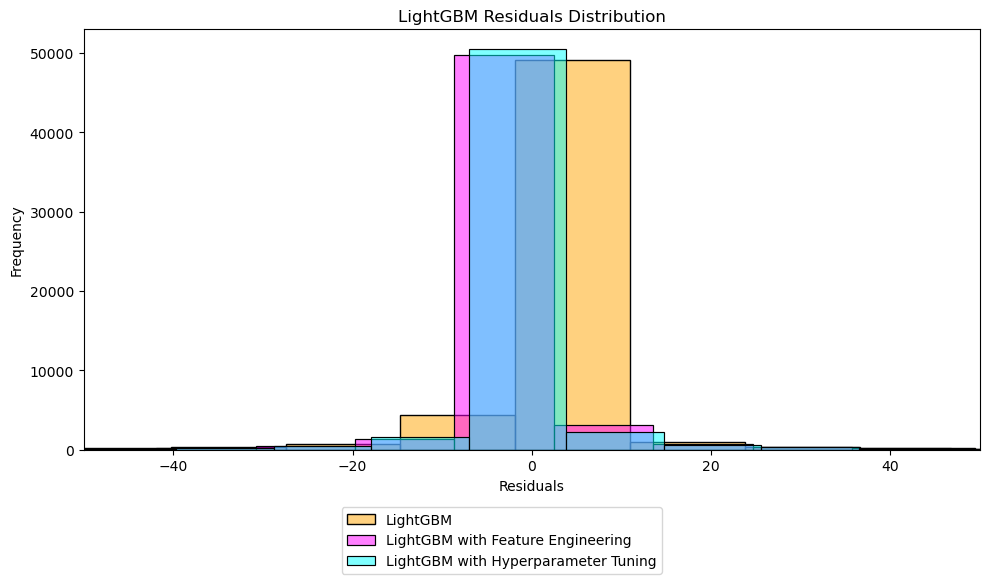

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_model_1['target_rides_next_hour'], bins=50, color='orange', label='LightGBM', alpha=0.5)
sns.histplot(residuals_model_2['target_rides_next_hour'], bins=50, color='magenta', label='LightGBM with Feature Engineering', alpha=0.5)
sns.histplot(residuals_model_3['target_rides_next_hour'], bins=50, color='cyan', label='LightGBM with Hyperparameter Tuning', alpha=0.5)
plt.xlim(-50, 50)
plt.title('LightGBM Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(0.28, -0.12))
plt.tight_layout()
plt.savefig(VISUALIZATIONS_DIR / 'lightgbm_residuals.png')
plt.show()

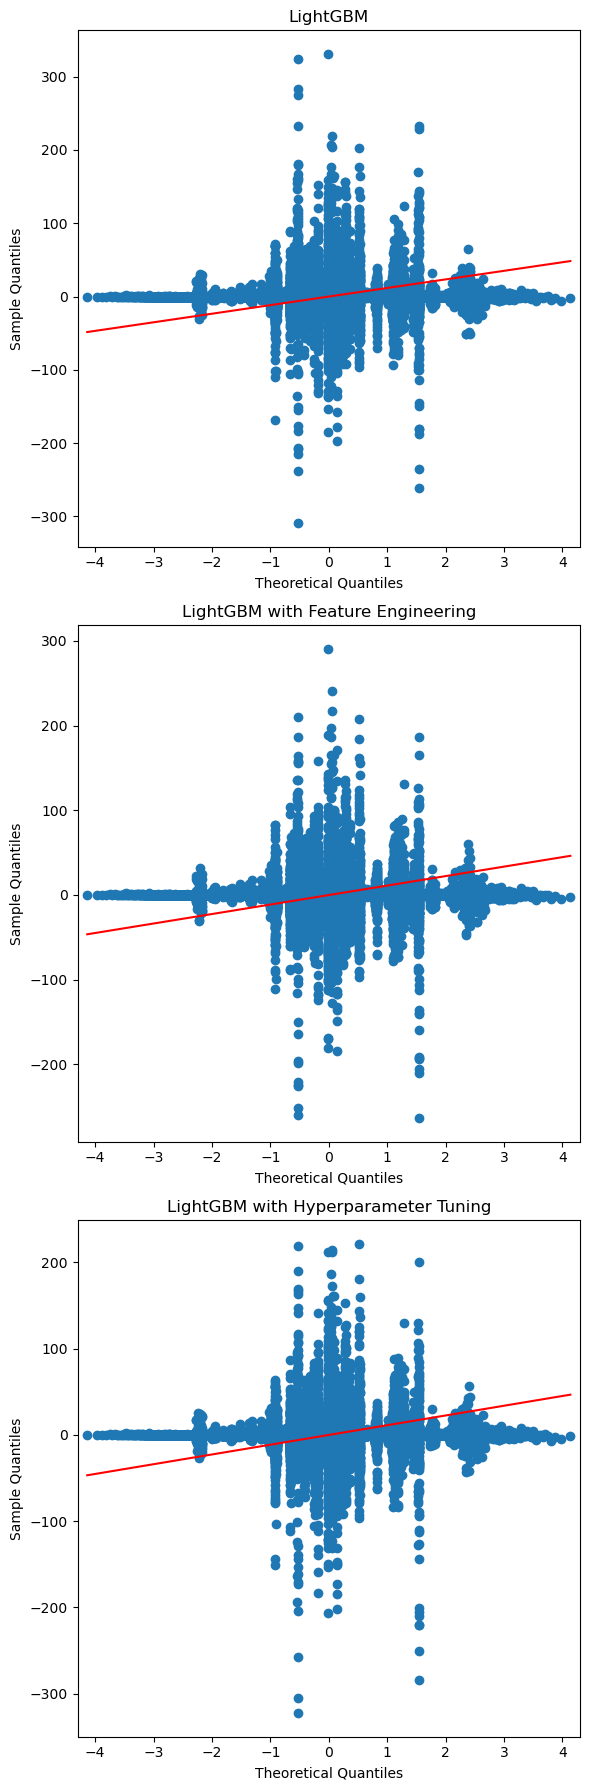

In [6]:
# QQ-plot

fig, ax = plt.subplots(3, 1, figsize=(6, 18))

sm.qqplot(residuals_model_1, line ='s', ax=ax[0])
ax[0].set_title('LightGBM')

sm.qqplot(residuals_model_2, line ='s', ax=ax[1])
ax[1].set_title('LightGBM with Feature Engineering')

sm.qqplot(residuals_model_3, line ='s', ax=ax[2])
ax[2].set_title('LightGBM with Hyperparameter Tuning')

plt.tight_layout()
plt.savefig(VISUALIZATIONS_DIR / 'qq_lightgbm_plot.png')
plt.show()